In [26]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

from warnings import filterwarnings 
filterwarnings('ignore')

In [3]:
sales_of_company = pd.read_csv('Series/monthly-sales-of-company-x-jan-6.csv')
robberies_in_boston = pd.read_csv('Series/monthly-boston-armed-robberies-j.csv')
#airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [5]:
all_series = {
    "Sales": sales_of_company["Count"],
    "Robberies": robberies_in_boston["Count"],
    "Temperature": mean_monthly_temp["Deg"],
    "Dow_Jones": dowjones_closing["Close"],
    "Births": female_births["Count"]
}

In [20]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

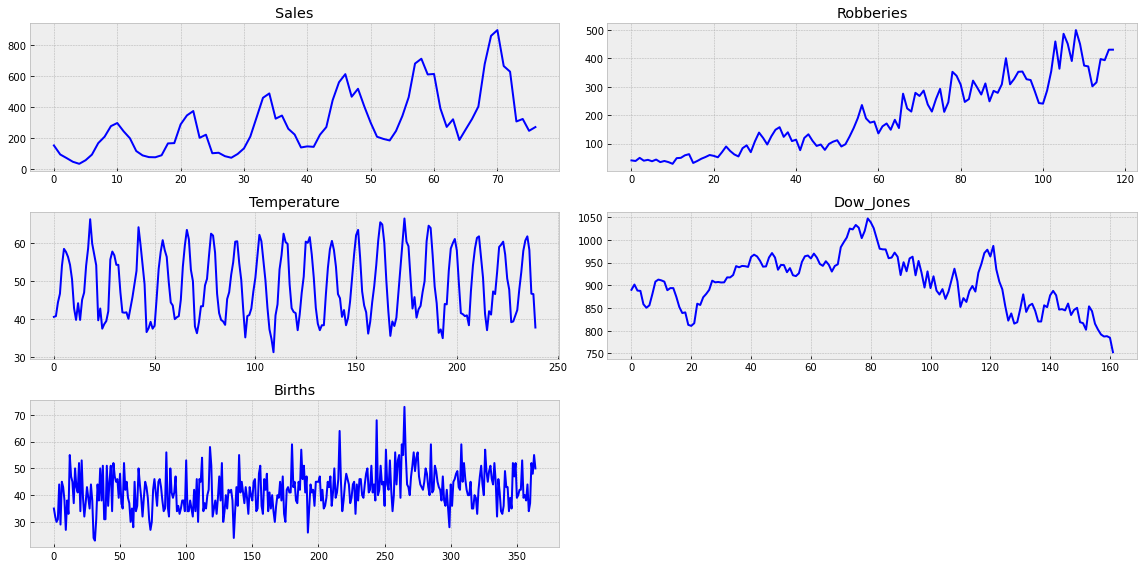

In [10]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

Series #1 - Sales

In [21]:
series_1 = all_series["Sales"]

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


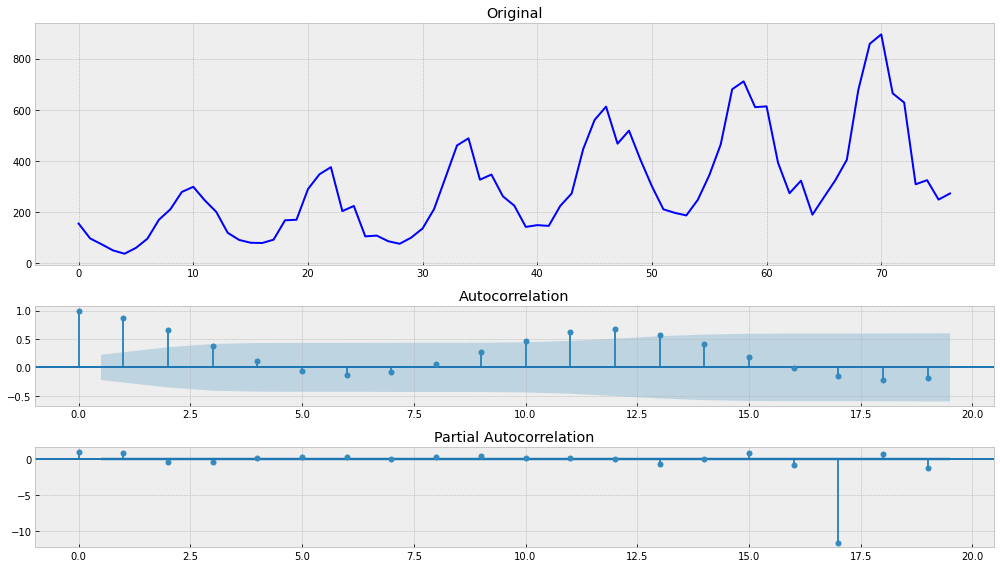

In [27]:
tsplot(series_1)

тест Дики-Фуллера и графики коррелограмм не позволюь отвергнуть гипотезу о нестационарности ряда. Попробуем уберать изменение дисперсии при помощи преобразования Бокса-Кокса

Results of Dickey-Fuller Test:
Test Statistic                 -1.121067
p-value                         0.706598
#Lags Used                      8.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64


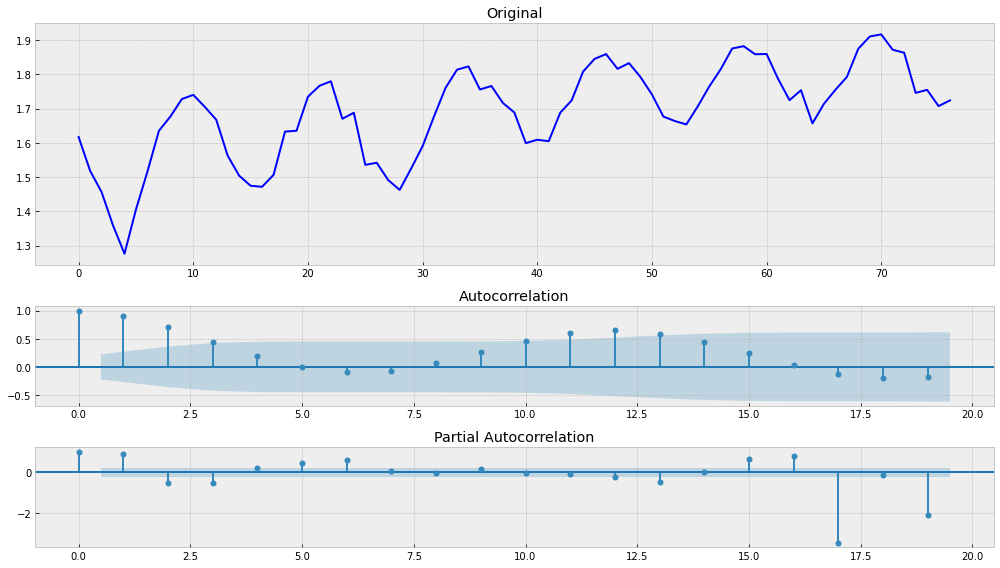

In [29]:
series_1 = boxcox(series_1, 0)
tsplot(series_1)

тест Дикки-Фуллера не отвергает гипотезу о нестационарности ряда, дифференцируем ряд.

In [30]:
series_1_1 = np.diff(series_1, 1)

Results of Dickey-Fuller Test:
Test Statistic                -8.837044e+00
p-value                        1.707993e-14
#Lags Used                     7.000000e+00
Number of Observations Used    6.800000e+01
Critical Value (1%)           -3.530399e+00
Critical Value (5%)           -2.905087e+00
Critical Value (10%)          -2.590001e+00
dtype: float64


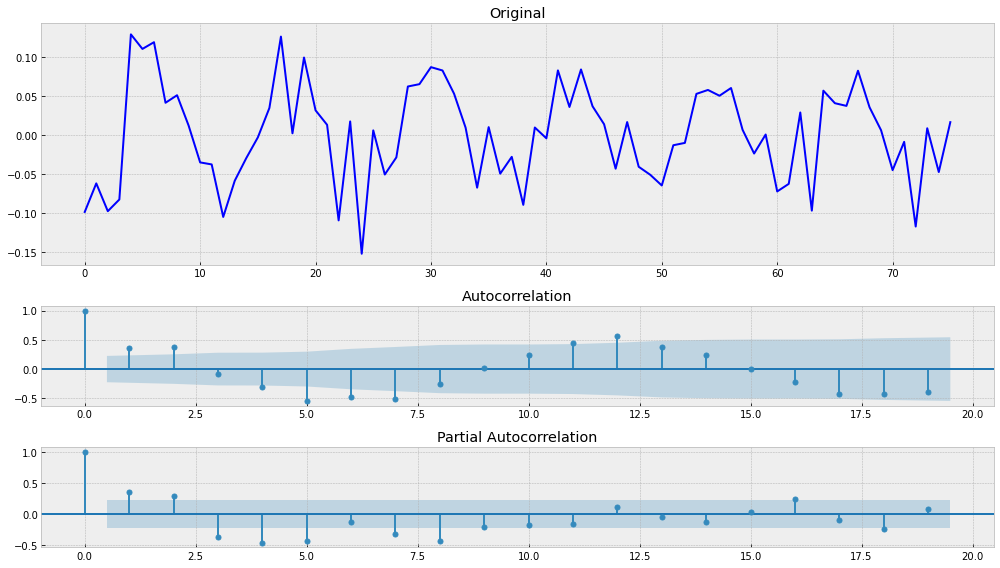

In [32]:
tsplot(series_1_1)

In [ ]:
Теперь тест Дики-Фуллера отвергают гипотезу о нестационарности ряда

Series #2 - Robberies

In [38]:
series_2 = all_series["Robberies"]

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


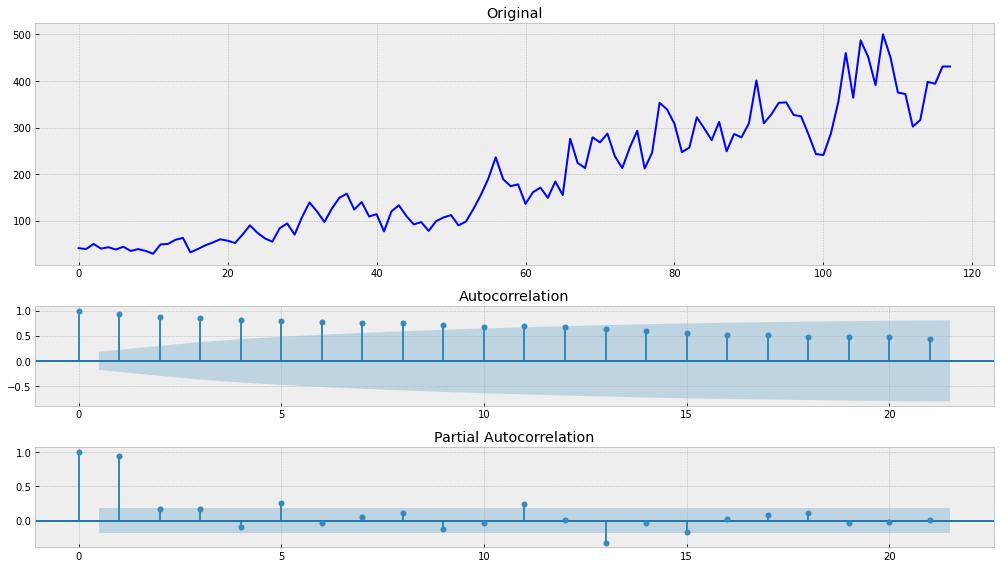

In [39]:
tsplot(series_2)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


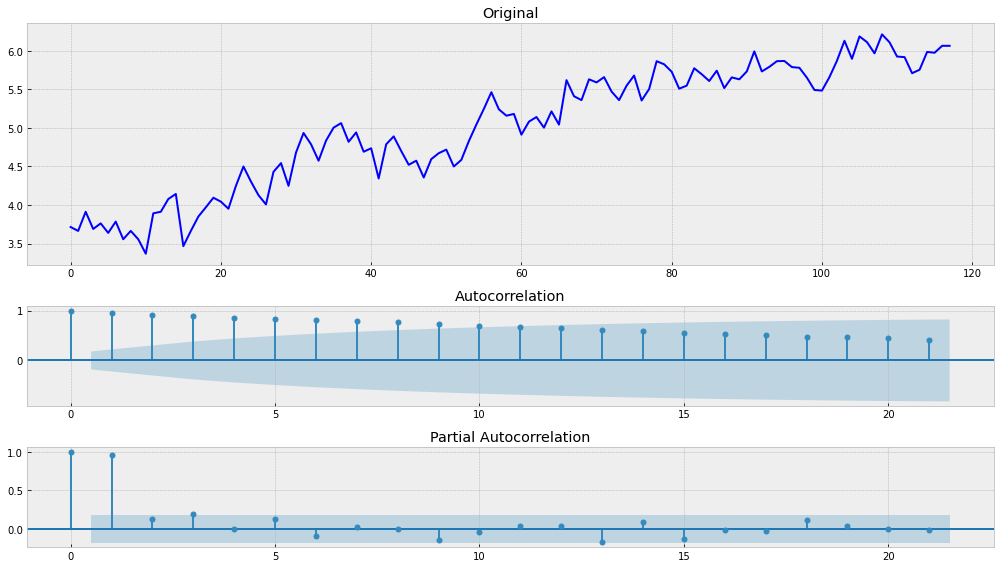

In [41]:
series_2 = boxcox(series_2, 0)
tsplot(series_2)

In [42]:
series_2_1 = np.diff(series_2, 1)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


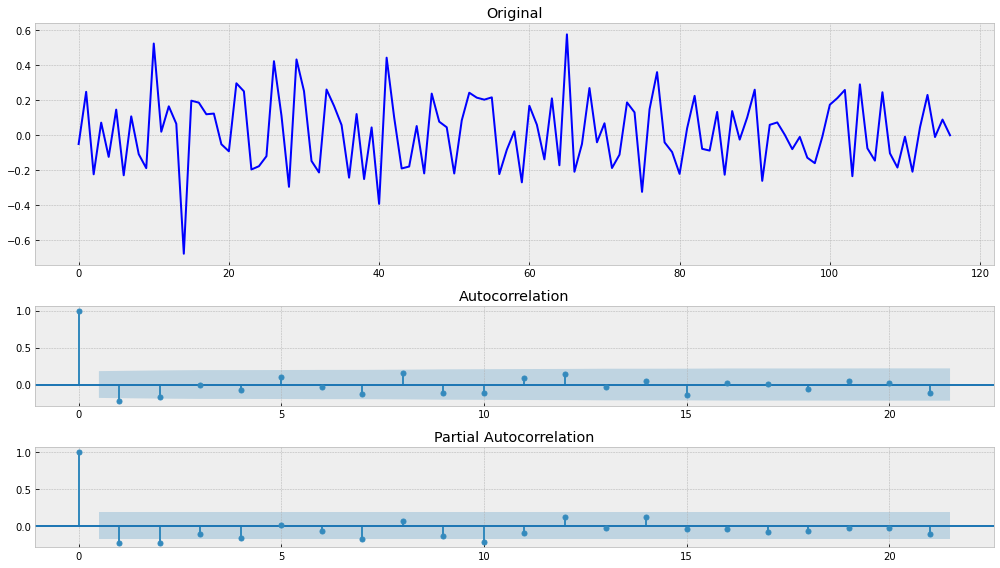

In [43]:
tsplot(series_2_1)

Results of Dickey-Fuller Test:
Test Statistic                 -4.232984
p-value                         0.000579
#Lags Used                     13.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


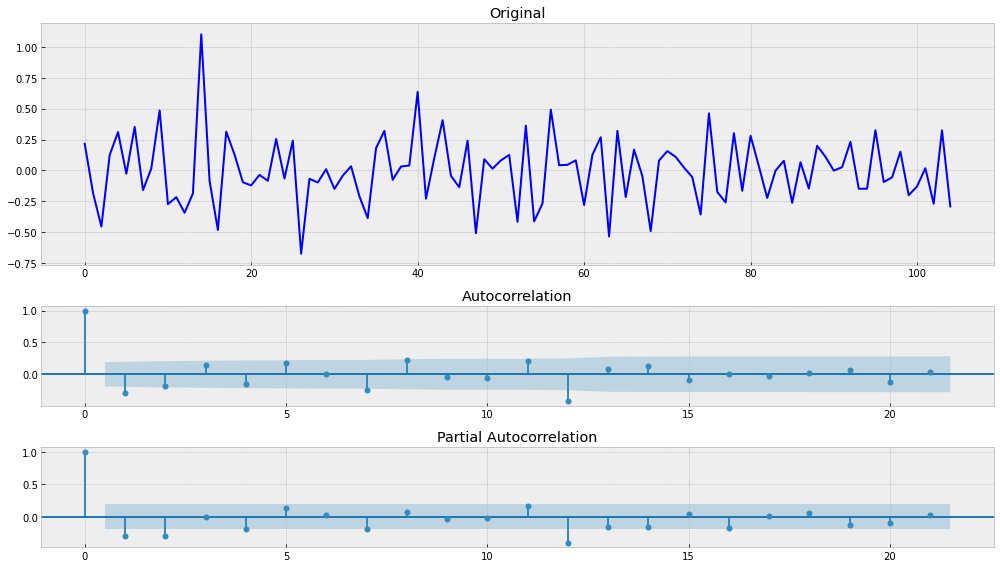

In [44]:
series_2_2 = series_2_1[12:] - series_2_1[:-12]
tsplot(series_2_2)

Теперь тест Дики-Фуллера отвергают гипотезу о нестационарности ряда

Series #3 - Temperature

In [45]:
series_3 = all_series["Temperature"]

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


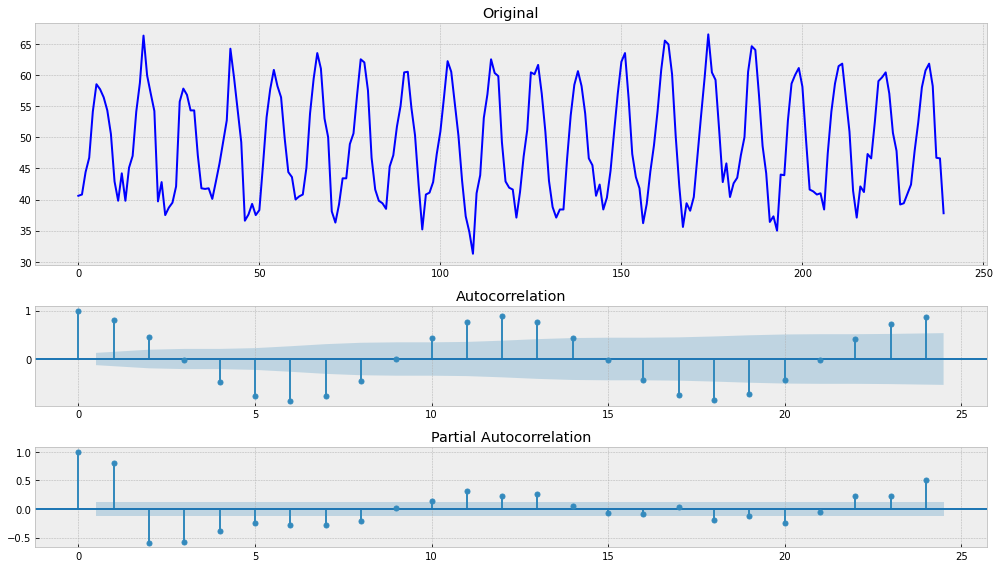

In [46]:
tsplot(series_3)

Results of Dickey-Fuller Test:
Test Statistic                  -3.760996
p-value                          0.003333
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


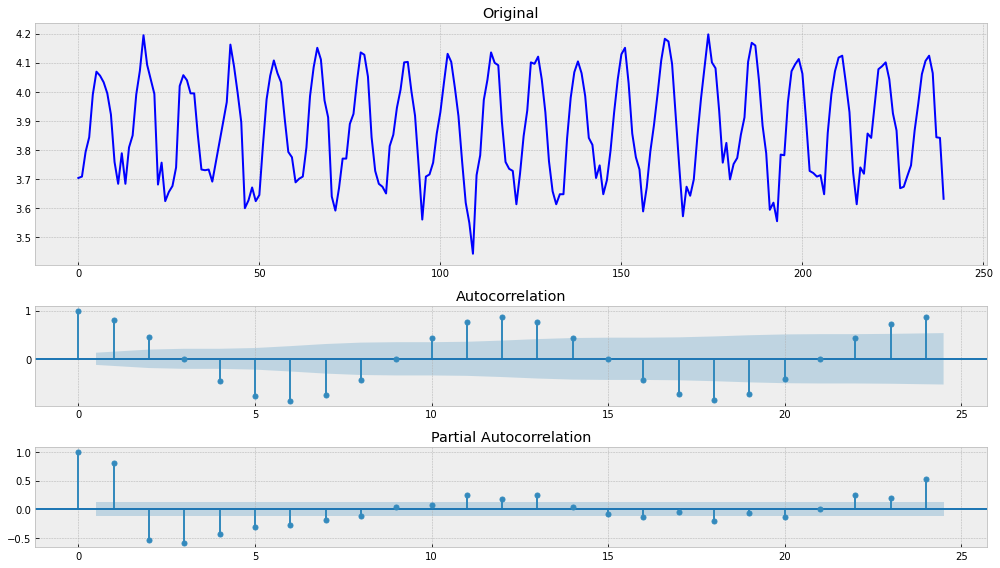

In [47]:
series_3 = boxcox(series_3, 0)
tsplot(series_3)

Results of Dickey-Fuller Test:
Test Statistic                -1.214226e+01
p-value                        1.640728e-22
#Lags Used                     1.100000e+01
Number of Observations Used    2.270000e+02
Critical Value (1%)           -3.459490e+00
Critical Value (5%)           -2.874358e+00
Critical Value (10%)          -2.573602e+00
dtype: float64


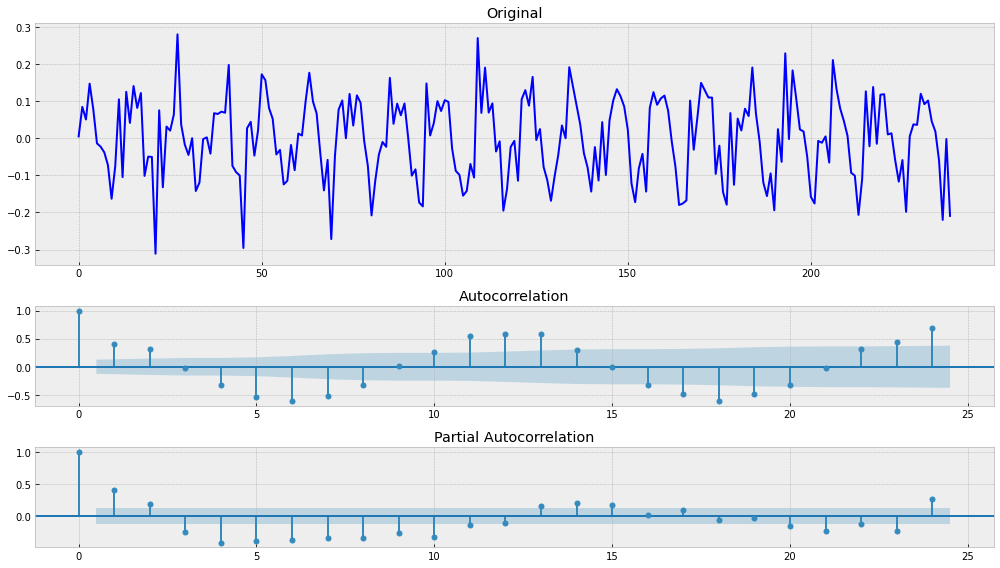

In [49]:
series_3_1 = np.diff(series_3, 1)
tsplot(series_3_1)

Results of Dickey-Fuller Test:
Test Statistic                -5.837933e+00
p-value                        3.837293e-07
#Lags Used                     1.400000e+01
Number of Observations Used    2.180000e+02
Critical Value (1%)           -3.460708e+00
Critical Value (5%)           -2.874891e+00
Critical Value (10%)          -2.573886e+00
dtype: float64


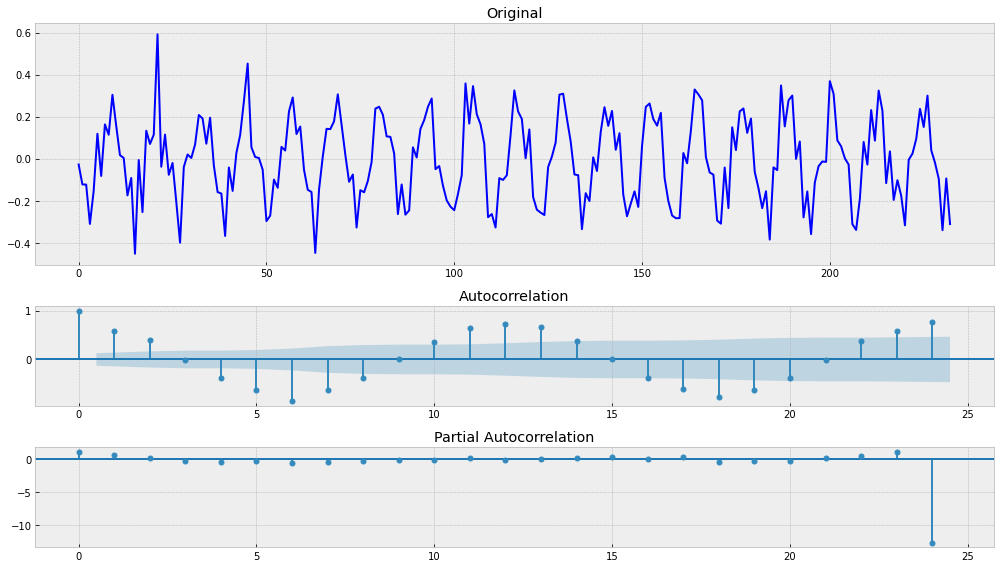

In [50]:
series_3_2 = series_3_1[6:] - series_3_1[:-6]
tsplot(series_3_2)

Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

Series #4 - Dow_Jones

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


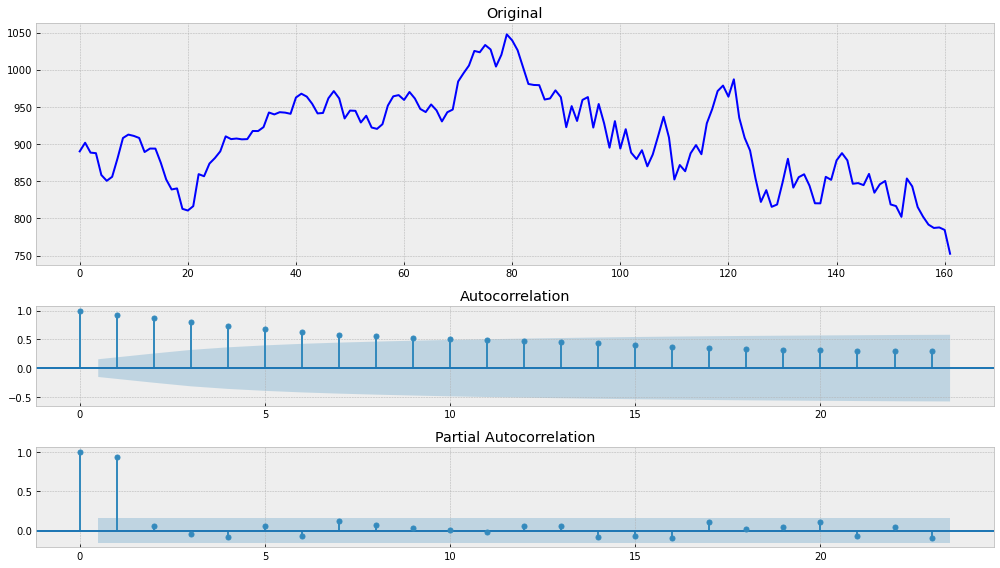

In [51]:
series_4 = all_series["Dow_Jones"]
tsplot(series_4)

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


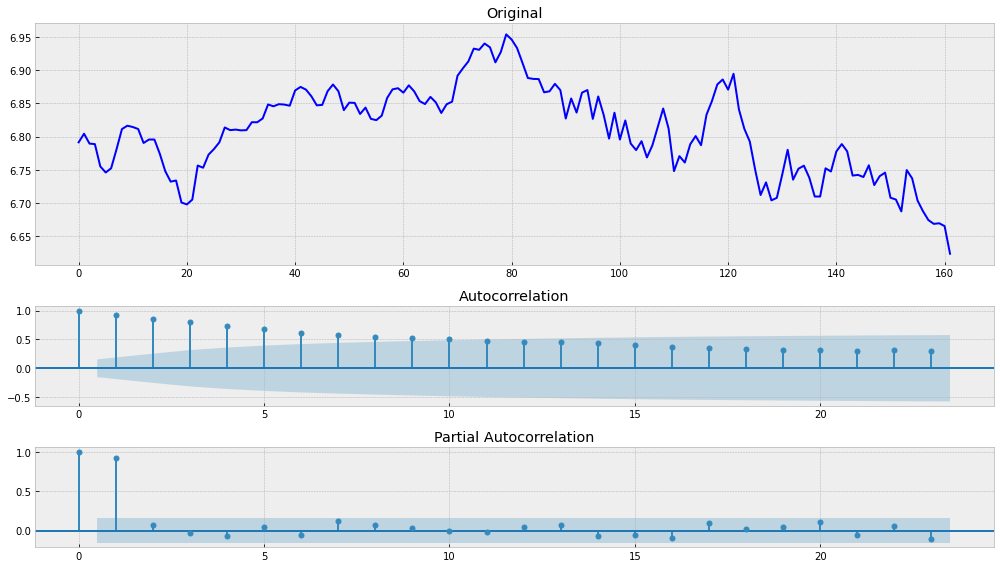

In [52]:
series_4 = boxcox(series_4, 0)
tsplot(series_4)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


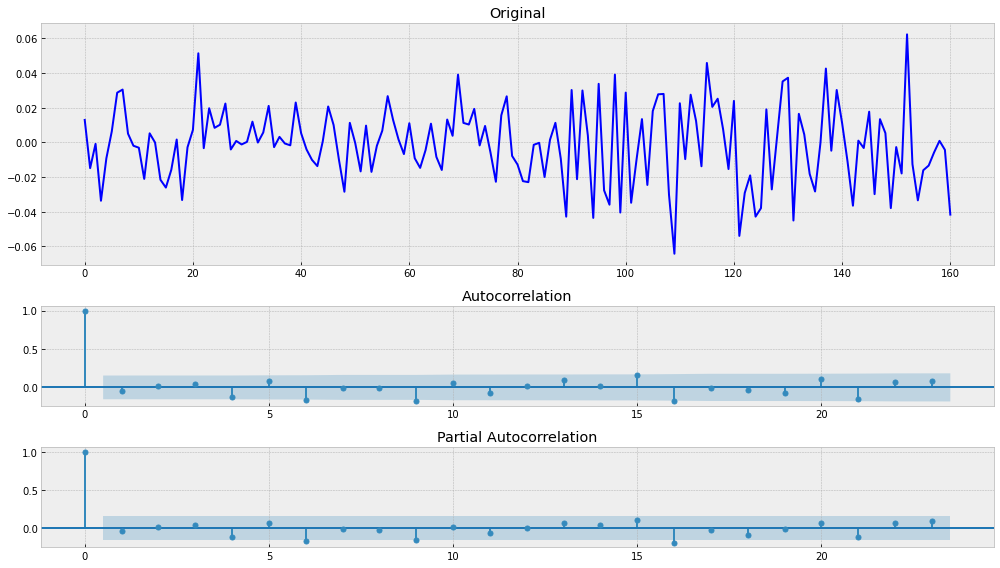

In [53]:
series_4_1 = np.diff(series_4, 1)
tsplot(series_4_1)

Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда

Series #5 - Births

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


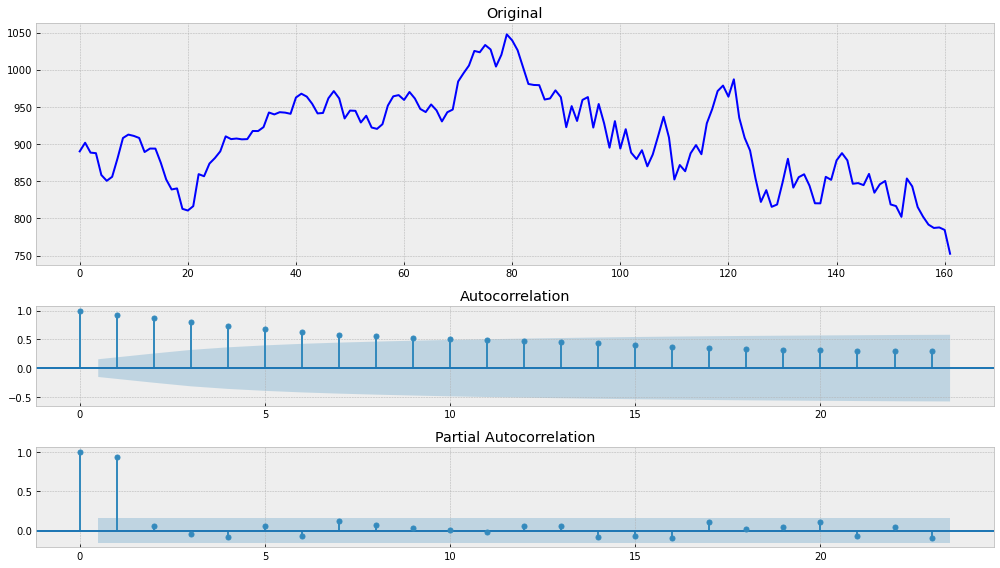

In [54]:
series_5 = all_series["Dow_Jones"]
tsplot(series_5)

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


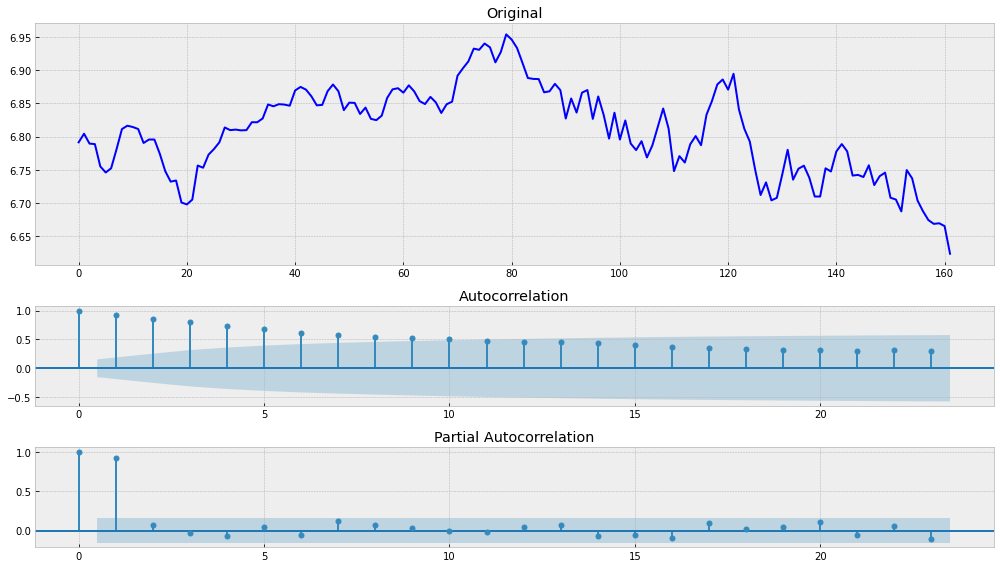

In [55]:
series_5 = boxcox(series_5, 0)
tsplot(series_5)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


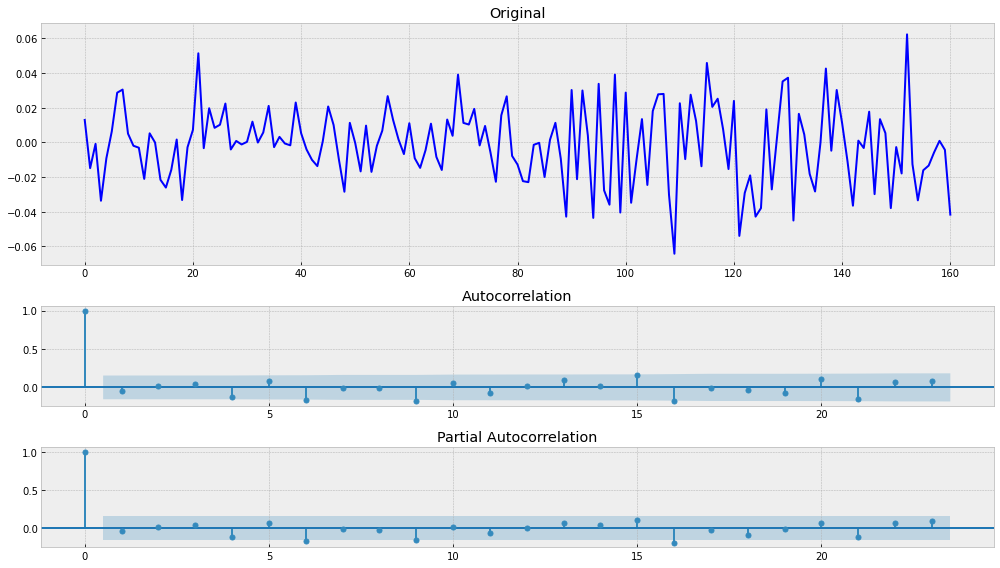

In [56]:
series_5_1 = np.diff(series_5, 1)
tsplot(series_5_1)

Results of Dickey-Fuller Test:
Test Statistic                -5.734289e+00
p-value                        6.492178e-07
#Lags Used                     1.100000e+01
Number of Observations Used    1.430000e+02
Critical Value (1%)           -3.476927e+00
Critical Value (5%)           -2.881973e+00
Critical Value (10%)          -2.577665e+00
dtype: float64


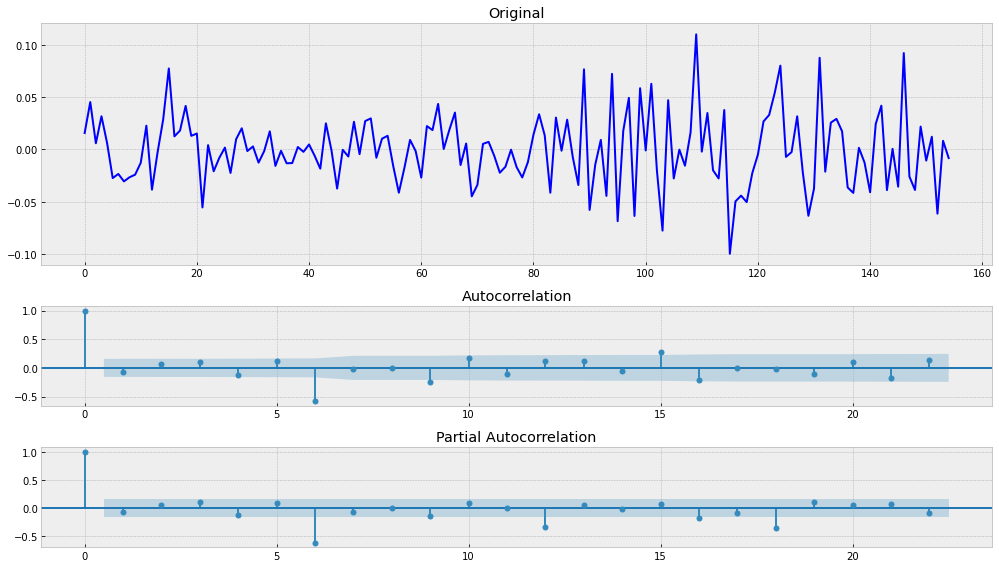

In [57]:
series_5_2 = series_5_1[6:] - series_5_1[:-6]
tsplot(series_5_2)

Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда